In [ ]:
import random
from deap import base, creator, tools, algorithms
from autogluon.tabular import TabularDataset, TabularPredictor

# Read the train data from the wine.csv file
train_data = TabularDataset('wine.csv')

# Define the multi-objective optimization problem
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

# Define the search space (decision variables)
toolbox = base.Toolbox()
toolbox.register("lambda_param", random.uniform, 1e-4, 1e-1)
toolbox.register("min_child_weight", random.uniform, 1, 10)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.lambda_param, toolbox.min_child_weight), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation function
def evaluate(individual):
    lambda_param, min_child_weight = individual
    
    # Train and evaluate the AutoGluon model with the given hyperparameters
    hyperparameter_space = {
        'model': 'XGB',
        'hyperparameters': {
            'lambda': lambda_param,
            'min_child_weight': min_child_weight,
        }
    }
    
    predictor = TabularPredictor(label='WineType').fit(train_data, hyperparameters=hyperparameter_space)
    
    # Obtain the model performance metrics
    accuracy = predictor.evaluate(valid_data)['accuracy']
    
    # Objective: Maximize accuracy, Minimize training time (placeholder; you can adjust based on your goals)
    training_time = 1.0
    
    return accuracy, training_time

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Define the optimization algorithm (NSGA-II)
def main():
    pop = toolbox.population(n=50)
    algorithms.eaMuPlusLambda(pop, toolbox, mu=50, lambda_=100, cxpb=0.7, mutpb=0.2, ngen=50, stats=None, halloffame=None, verbose=True)

    # Get the best individual(s) found by NSGA-II
    best_individuals = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]

    # Use the best hyperparameters to train the final AutoGluon model
    best_hyperparameters = [indiv[0] for indiv in best_individuals]
    best_hyperparameters = best_hyperparameters[0]  # Assuming only one best individual, you may need to adjust if multiple

    hyperparameter_space = {
        'model': 'XGB',
        'hyperparameters': {
            'lambda': best_hyperparameters[0],
            'min_child_weight': best_hyperparameters[1],
        }
    }

    final_predictor = TabularPredictor(label='WineType').fit(train_data, hyperparameters=hyperparameter_space)
    
    # You can save or use the final_predictor for making predictions on new data
    final_predictions = final_predictor.predict(new_data)

toolbox.register("evaluate", evaluate)


In [ ]:
import random
from deap import base, creator, tools, algorithms
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
from autogluon.tabular.models import XGBoostModel
import matplotlib.pyplot as plt

# Read the wine dataset
dataset = TabularDataset('wine.csv')

# Define the features and target column
features = ['alcohol', 'ash', 'proline']
target = 'alcohol'

# Define the standard hyperparameters for AutoGluon
standard_hyperparameters = {
    'model': 'XGB',
    'hyperparameters': {
        'lambda': 1e-4,
        'min_child_weight': 1,
    }
}

# Train the initial AutoGluon model
initial_predictor = TabularPredictor(label=target).fit(dataset, hyperparameters=standard_hyperparameters)

# Run NSGA-II to find the best hyperparameters
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("lambda_param", random.uniform, 1e-4, 1e-1)
toolbox.register("min_child_weight", random.uniform, 1, 10)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.lambda_param, toolbox.min_child_weight), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    lambda_param, min_child_weight = individual
    
    hyperparameters = {
        'model': 'XGB',
        'hyperparameters': {
            'lambda': lambda_param,
            'min_child_weight': min_child_weight,
        }
    }
    
    predictor = TabularPredictor(label=target).fit(dataset, hyperparameters=hyperparameters)
    accuracy = predictor.evaluate(dataset)['accuracy']
    
    training_time = 1.0
    
    return accuracy, training_time

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

def main():
    pop = toolbox.population(n=50)
    TabularPredictor.register_model(model_type='XGB', model=XGBoostModel)

    return initial_predictor, final_predictor

# Register XGBoost as a custom model preset
TabularPredictor.register_model(model_type='XGB', model=XGBoostModel)


gen	nevals
0  	25    
1  	18    
2  	18    
3  	18    
4  	18    
5  	19    
6  	19    
7  	18    
8  	18    
9  	17    
10 	19    
best indi [[76.8052329543903, 4.563969646527056, 1.1740220531946404], [50.98829394408001, 3.0714357639091565, 1.4755599214060875], [86.80127074154728, 6.135675766025123, 1.9196632259521036], [68.61030243533381, 4.108415528644644, 1.4121444059757937], [76.8052329543903, 5.880048132179074, 1.1740220531946404], [57.19706615100975, 5.470386706934581, 1.4135941768067806], [50.23933996351259, 8.850937832127013, 1.431385420791031], [74.64347602857261, 4.452370357408334, 1.4669688821554996], [77, 7, 1.3348230275197572], [98, 9, 1.8486153728758041], [42, 2, 1.5207841350053295], [77, 7, 1.3348230275197572], [44.946608948302995, 0.8406189021577308, 1.603052177269166], [77, 7, 1.3348230275197572]]
best hyper [76.8052329543903, 4.563969646527056, 1.1740220531946404]
Best Hyperparameters:
Num Boost Round: 76.8052329543903
Max Depth: 4.563969646527056
Min Child Weight: 1

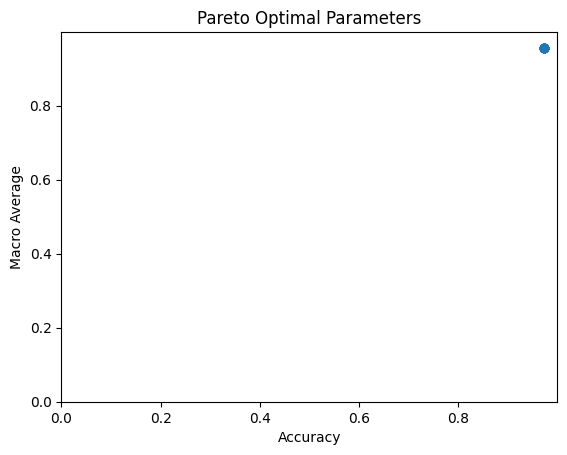

In [20]:
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df' with columns: 'WineType', 'Alcohol', 'AshAlkalinity', etc.
# Replace 'WineType' with the actual target variable and other columns with your features
df = pd.read_csv('wine.csv')
X = df.drop(columns=['ash', 'proline'])
y = df['alcohol']

# Convert the target variable to integer type
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the evaluation function
def evaluate(individual):
    num_boost_round, max_depth, min_child_weight = individual
    min_child_weight = max(0.0000000001, min_child_weight)  # Ensure min_child_weight is greater than or equal to 0
    num_boost_round = int(num_boost_round)
    max_depth = max(0,int(max_depth))  # XGBoost requires integer values for these parameters
    # Define XGBoost hyperparameters
    params = {
        'objective': 'multi:softmax',  # Example: For multiclass classification
        'num_class': 178,  # Number of classes in your problem
        'booster': 'gbtree',  # 'gbtree' or 'gblinear'
        'lambda': 10,  # Regularization term
        'min_child_weight': int(min_child_weight),  # Minimum sum of instance weight (hessian) needed in a child
        'subsample': 0.8,  # Subsample ratio of the training instance
        'colsample_bylevel': 0.8,  # Subsample ratio of columns for each level
        'colsample_bytree': 0.8,  # Subsample ratio of columns for each tree
        'learning_rate': 0.1,  # Step size shrinkage to prevent overfitting
        'num_boost_round': int(num_boost_round),  # Number of boosting rounds
        'max_depth': int(max_depth),  # Maximum depth of a tree
        # Add more XGBoost parameters as needed
    }

    # ...

    min_child_weight = int(min_child_weight)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Train the XGBoost model
    dtrain = xgb.DMatrix(X_train, label=y_train)
    model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

    # Make predictions on the test set
    y_pred = model.predict(dtest)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)

    # Calculate macro average
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_avg = report['macro avg']['f1-score']

    return accuracy, macro_avg

# Define the optimization problem
creator.create("FitnessMulti", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("num_boost_round", random.randint, 1, 100)
toolbox.register("max_depth", random.randint, 1, 10)
toolbox.register("min_child_weight", random.uniform, 1, 10)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.num_boost_round, toolbox.max_depth, toolbox.min_child_weight), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Run the optimization algorithm (NSGA-II)
def main():
    # Suppress runtime warnings and user warnings
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    pop = toolbox.population(n=25)
    algorithms.eaMuPlusLambda(pop, toolbox, mu=14, lambda_=20, cxpb=0.7, mutpb=0.2, ngen=10, stats=None, halloffame=None, verbose=True)

    # Get the best individual(s) found by NSGA-II
    best_individuals = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]
    print('best indi',best_individuals)
    # Extract the hyperparameters of the best individual
    best_hyperparameters = best_individuals[0]
    best_hyperparameters = best_hyperparameters  # Assuming only one best individual, you may need to adjust if multiple
    print('best hyper',best_hyperparameters)
    # Evaluate the best individual
    best_accuracy, best_macro_avg = evaluate(best_hyperparameters)

    # Print the best hyperparameters and their performance
    print("Best Hyperparameters:")
    print("Num Boost Round:", best_hyperparameters[0])
    print("Max Depth:", best_hyperparameters[1])
    print("Min Child Weight:", best_hyperparameters[2])
    print("Best Accuracy:", best_accuracy)
    print("Best Macro Average:", best_macro_avg)

    # Plot the Pareto optimal parameters
    pareto_front = np.array([indiv.fitness.values for indiv in best_individuals])
    print('pareto',pareto_front)
    plt.scatter(pareto_front[:, 0], pareto_front[:,1])
    plt.xlim(0, 0.999)  # Set the x-axis limits from 0 to 1
    plt.ylim(0, 0.999)  # Set the y-axis limits from 0 to 1
    plt.xlabel("Accuracy")
    plt.ylabel("Macro Average")
    plt.title("Pareto Optimal Parameters")
    plt.show()

main()


In [22]:
# Plot the Pareto optimal parameters
pareto_front = np.array([indiv.fitness.values for indiv in best_individuals])
print('pareto',pareto_front)
plt.scatter(pareto_front[:, 0], pareto_front[1,:])
plt.xlim(0, 0.999)  # Set the x-axis limits from 0 to 1
plt.ylim(0, 0.999)  # Set the y-axis limits from 0 to 1
plt.xlabel("Accuracy")
plt.ylabel("Macro Average")
plt.title("Pareto Optimal Parameters")
plt.show()


NameError: name 'best_individuals' is not defined